# Chirp fit study

Creation of the chirped pulse and its analysis (no FROG).
Estimation of the initial gaussian pulse with initial duration pdur and after adding quadratic term to the spectral phase.

[1] Femtosecond Laser Pulses: Linear Properties, Manipulation, Generation and Measurement 
Matthias Wollenhaupt, Andreas Assion and Thomas Baumert 
https://www.uni-kassel.de/fb10/fileadmin/datas/fb10/physik/femtosek/downloads/Sonstiges/Skript-Version30.pdf

Pulse creation follows formulas (2.24)-(2.25).

In [2]:
%matplotlib inline
import matplotlib.pyplot as ppl
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import numpy
from numpy import size, mean, log, pi, zeros, max, sum, round, diff, trapz, flipud, arange, exp, angle, roll, sqrt
from makeFROG import makeFROG
from mainFROG import mainFROG

from scipy import interpolate
from analyze import analyzepulse

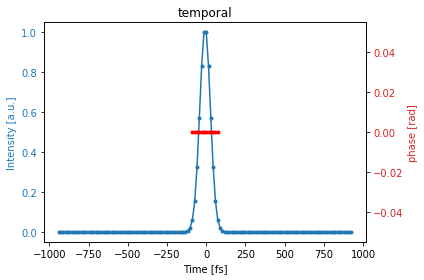

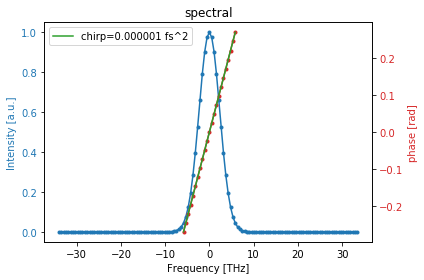

bandwidth    :  5.515934322812964 THz (intensity FWHM)
duration     :  81.35602518993716 fs (intensity FWHM)
duration from 2nd momentum: 79.99999999999976
chirp phi"   : -1.2670129337096807e-06 fs^2
max frequency: [0.] THz
-----------------------------------
expected duration: 80.0 fs
expected phi''   : 0 fs^(2)


In [3]:
deltaDelay=14.7 #in fs
#deltaDelay=5 
N=128
deltaFreq = 1000/(N*deltaDelay) #step in frequency in ThZ
# x axis labels and plot ranges
timeLabels = arange((-deltaDelay*(N-1)/2), (deltaDelay*((N-1)/2+1)), deltaDelay).T
#freqLabels = arange((-deltaFreq*(N-1)/2), (deltaFreq*((N-1)/2+1)), deltaFreq).T
freqLabels = 1000*numpy.fft.fftshift(numpy.fft.fftfreq(len(timeLabels), deltaDelay))

#inputs to compare with Table 2.2 in [1]
pdur=80 #initial duration of the pulse defined as FWHM of intesity
phi2=0 #fs^2  - quadratic term of added to the phase (chirp)
betapaper=pdur**2/(8*numpy.log(2))
gammapaper=1+phi2**2/(4*(betapaper**2))
apaper=phi2/(8*(betapaper**2)*gammapaper)

#FWHM - sigma for gaussian pulse conversion https://en.wikipedia.org/wiki/Full_width_at_half_maximum
sigma=pdur/(2*sqrt(2*numpy.log(2)))
#initialIntensity = exp(-timeLabels**2/2/(sigma*sigma))
initialIntensity = exp(-timeLabels**2/(4*betapaper*gammapaper))
initialPhase = exp(1j*apaper*timeLabels**2)
initialPulse = initialIntensity*initialPhase

analyzepulse(initialPulse,deltaDelay,0,True)

durationout = sqrt(pdur**2+(4*log(2)*(phi2/pdur))**2)
print("-----------------------------------")
print("expected duration:",durationout, "fs")
print("expected phi''   :",phi2,"fs^(2)")